In [26]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn import preprocessing
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import SVR

from lightgbm import LGBMRegressor
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, ElasticNet, SGDRegressor, BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from catboost import CatBoostRegressor
from sklearn.kernel_ridge import KernelRidge
from xgboost.sklearn import XGBRegressor

import sklearn.metrics as metrics
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [5]:
file_path = r"C:\Users\chris\OneDrive\ds\_datasets\sleep\Sleep_Efficiency.csv"
df = pd.read_csv(file_path)
#df = pd.read_csv(file_path, parse_dates=["Date"])
#df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df = df.reset_index(drop=True)
df.head()

ID  Age  Gender          Bedtime     Wakeup time  Sleep duration  \
0   1   65  Female    3/6/2021 1:00   3/6/2021 7:00             6.0   
1   2   69    Male   12/5/2021 2:00  12/5/2021 9:00             7.0   
2   3   40  Female  5/25/2021 21:30  5/25/2021 5:30             8.0   
3   4   40  Female   11/3/2021 2:30  11/3/2021 8:30             6.0   
4   5   57    Male   3/13/2021 1:00  3/13/2021 9:00             8.0   

   Sleep efficiency  REM sleep percentage  Deep sleep percentage  \
0              0.88                    18                     70   
1              0.66                    24                     28   
2              0.89                    20                     70   
3              0.51                    28                     25   
4              0.76                    27                     55   

   Light sleep percentage  Awakenings  Caffeine consumption  \
0                      10         0.0                   0.0   
1                      53         3.0                   0.0   
2                      10         1.0                   0.0   
3                      52         3.0                  50.0   
4                      18         3.0                   0.0   

   Alcohol consumption Smoking status  Exercise frequency  
0                  0.0            Yes                 3.0  
1                  3.0            Yes                 3.0  
2                  0.0             No                 3.0  
3                  5.0            Yes                 1.0  
4                  3.0             No                 3.0

In [6]:
df['male'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['smoking'] = df['Smoking status'].map({'Yes': 1, 'No': 0})
df.head()

#This approach creates a dictionary that maps the string values in the Gender and Smoking status columns to their respective numerical values, 
#and then applies the mapping to the entire column using the map method. This method can be more efficient when mapping a large number of values, 
#as the mapping is performed using a hash table and therefore has a time complexity of O(1).

#alt code: 
#df['male'] = df['Gender'].apply(lambda x:1 if x == 'Male' else 0)
#df['smoking'] = df['Smoking status'].apply(lambda x:1 if x == 'Yes' else 0)
#df.head()

ID  Age  Gender          Bedtime     Wakeup time  Sleep duration  \
0   1   65  Female    3/6/2021 1:00   3/6/2021 7:00             6.0   
1   2   69    Male   12/5/2021 2:00  12/5/2021 9:00             7.0   
2   3   40  Female  5/25/2021 21:30  5/25/2021 5:30             8.0   
3   4   40  Female   11/3/2021 2:30  11/3/2021 8:30             6.0   
4   5   57    Male   3/13/2021 1:00  3/13/2021 9:00             8.0   

   Sleep efficiency  REM sleep percentage  Deep sleep percentage  \
0              0.88                    18                     70   
1              0.66                    24                     28   
2              0.89                    20                     70   
3              0.51                    28                     25   
4              0.76                    27                     55   

   Light sleep percentage  Awakenings  Caffeine consumption  \
0                      10         0.0                   0.0   
1                      53         3.0                   0.0   
2                      10         1.0                   0.0   
3                      52         3.0                  50.0   
4                      18         3.0                   0.0   

   Alcohol consumption Smoking status  Exercise frequency  male  smoking  
0                  0.0            Yes                 3.0     0        1  
1                  3.0            Yes                 3.0     1        1  
2                  0.0             No                 3.0     0        0  
3                  5.0            Yes                 1.0     0        1  
4                  3.0             No                 3.0     1        0

In [7]:
df = df.drop(['ID', 'Bedtime', 'Wakeup time', 'Gender', 'Smoking status'], axis='columns')
df.head()

Age  Sleep duration  Sleep efficiency  REM sleep percentage  \
0   65             6.0              0.88                    18   
1   69             7.0              0.66                    24   
2   40             8.0              0.89                    20   
3   40             6.0              0.51                    28   
4   57             8.0              0.76                    27   

   Deep sleep percentage  Light sleep percentage  Awakenings  \
0                     70                      10         0.0   
1                     28                      53         3.0   
2                     70                      10         1.0   
3                     25                      52         3.0   
4                     55                      18         3.0   

   Caffeine consumption  Alcohol consumption  Exercise frequency  male  \
0                   0.0                  0.0                 3.0     0   
1                   0.0                  3.0                 3.0     1   
2                   0.0                  0.0                 3.0     0   
3                  50.0                  5.0                 1.0     0   
4                   0.0                  3.0                 3.0     1   

   smoking  
0        1  
1        1  
2        0  
3        1  
4        0

In [8]:
df.describe(include='all')

Age  Sleep duration  Sleep efficiency  REM sleep percentage  \
count  452.000000      452.000000        452.000000            452.000000   
mean    40.285398        7.465708          0.788916             23.002212   
std     13.172250        0.866625          0.135237              3.972466   
min      9.000000        5.000000          0.500000             15.000000   
25%     29.000000        7.000000          0.697500             20.000000   
50%     40.000000        7.500000          0.820000             22.000000   
75%     52.000000        8.000000          0.900000             27.000000   
max     69.000000       10.000000          0.990000             30.000000   

       Deep sleep percentage  Light sleep percentage  Awakenings  \
count             452.000000              452.000000  432.000000   
mean               52.960177               24.831858    1.641204   
std                15.561713               15.150774    1.356762   
min                20.000000                7.000000    0.000000   
25%                51.250000               15.000000    1.000000   
50%                60.000000               18.000000    1.000000   
75%                63.000000               27.250000    3.000000   
max                75.000000               56.000000    4.000000   

       Caffeine consumption  Alcohol consumption  Exercise frequency  \
count            427.000000           436.000000          446.000000   
mean              23.653396             1.245413            1.791480   
std               30.202785             1.643336            1.428134   
min                0.000000             0.000000            0.000000   
25%                0.000000             0.000000            0.000000   
50%               25.000000             0.000000            2.000000   
75%               50.000000             2.000000            3.000000   
max              200.000000             5.000000            5.000000   

             male     smoking  
count  452.000000  452.000000  
mean     0.504425    0.356195  
std      0.500534    0.479404  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      1.000000    0.000000  
75%      1.000000    1.000000  
max      1.000000    1.000000

In [9]:
df = df.dropna()
df.describe(include='all')

Age  Sleep duration  Sleep efficiency  REM sleep percentage  \
count  386.000000      386.000000        386.000000            386.000000   
mean    40.971503        7.450777          0.790285             23.007772   
std     13.291994        0.885034          0.135293              3.875657   
min      9.000000        5.000000          0.500000             15.000000   
25%     29.000000        7.000000          0.702500             20.000000   
50%     41.000000        7.500000          0.820000             22.000000   
75%     52.000000        8.000000          0.900000             27.000000   
max     69.000000       10.000000          0.990000             30.000000   

       Deep sleep percentage  Light sleep percentage  Awakenings  \
count             386.000000              386.000000  386.000000   
mean               53.041451               24.642487    1.616580   
std                15.456124               15.069076    1.357283   
min                20.000000                7.000000    0.000000   
25%                55.000000               15.000000    1.000000   
50%                60.000000               18.000000    1.000000   
75%                63.000000               22.000000    3.000000   
max                75.000000               56.000000    4.000000   

       Caffeine consumption  Alcohol consumption  Exercise frequency  \
count            386.000000           386.000000          386.000000   
mean              22.797927             1.227979            1.766839   
std               29.026555             1.638766            1.446012   
min                0.000000             0.000000            0.000000   
25%                0.000000             0.000000            0.000000   
50%               12.500000             0.000000            2.000000   
75%               50.000000             2.000000            3.000000   
max              200.000000             5.000000            5.000000   

             male     smoking  
count  386.000000  386.000000  
mean     0.502591    0.360104  
std      0.500642    0.480653  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      1.000000    0.000000  
75%      1.000000    1.000000  
max      1.000000    1.000000

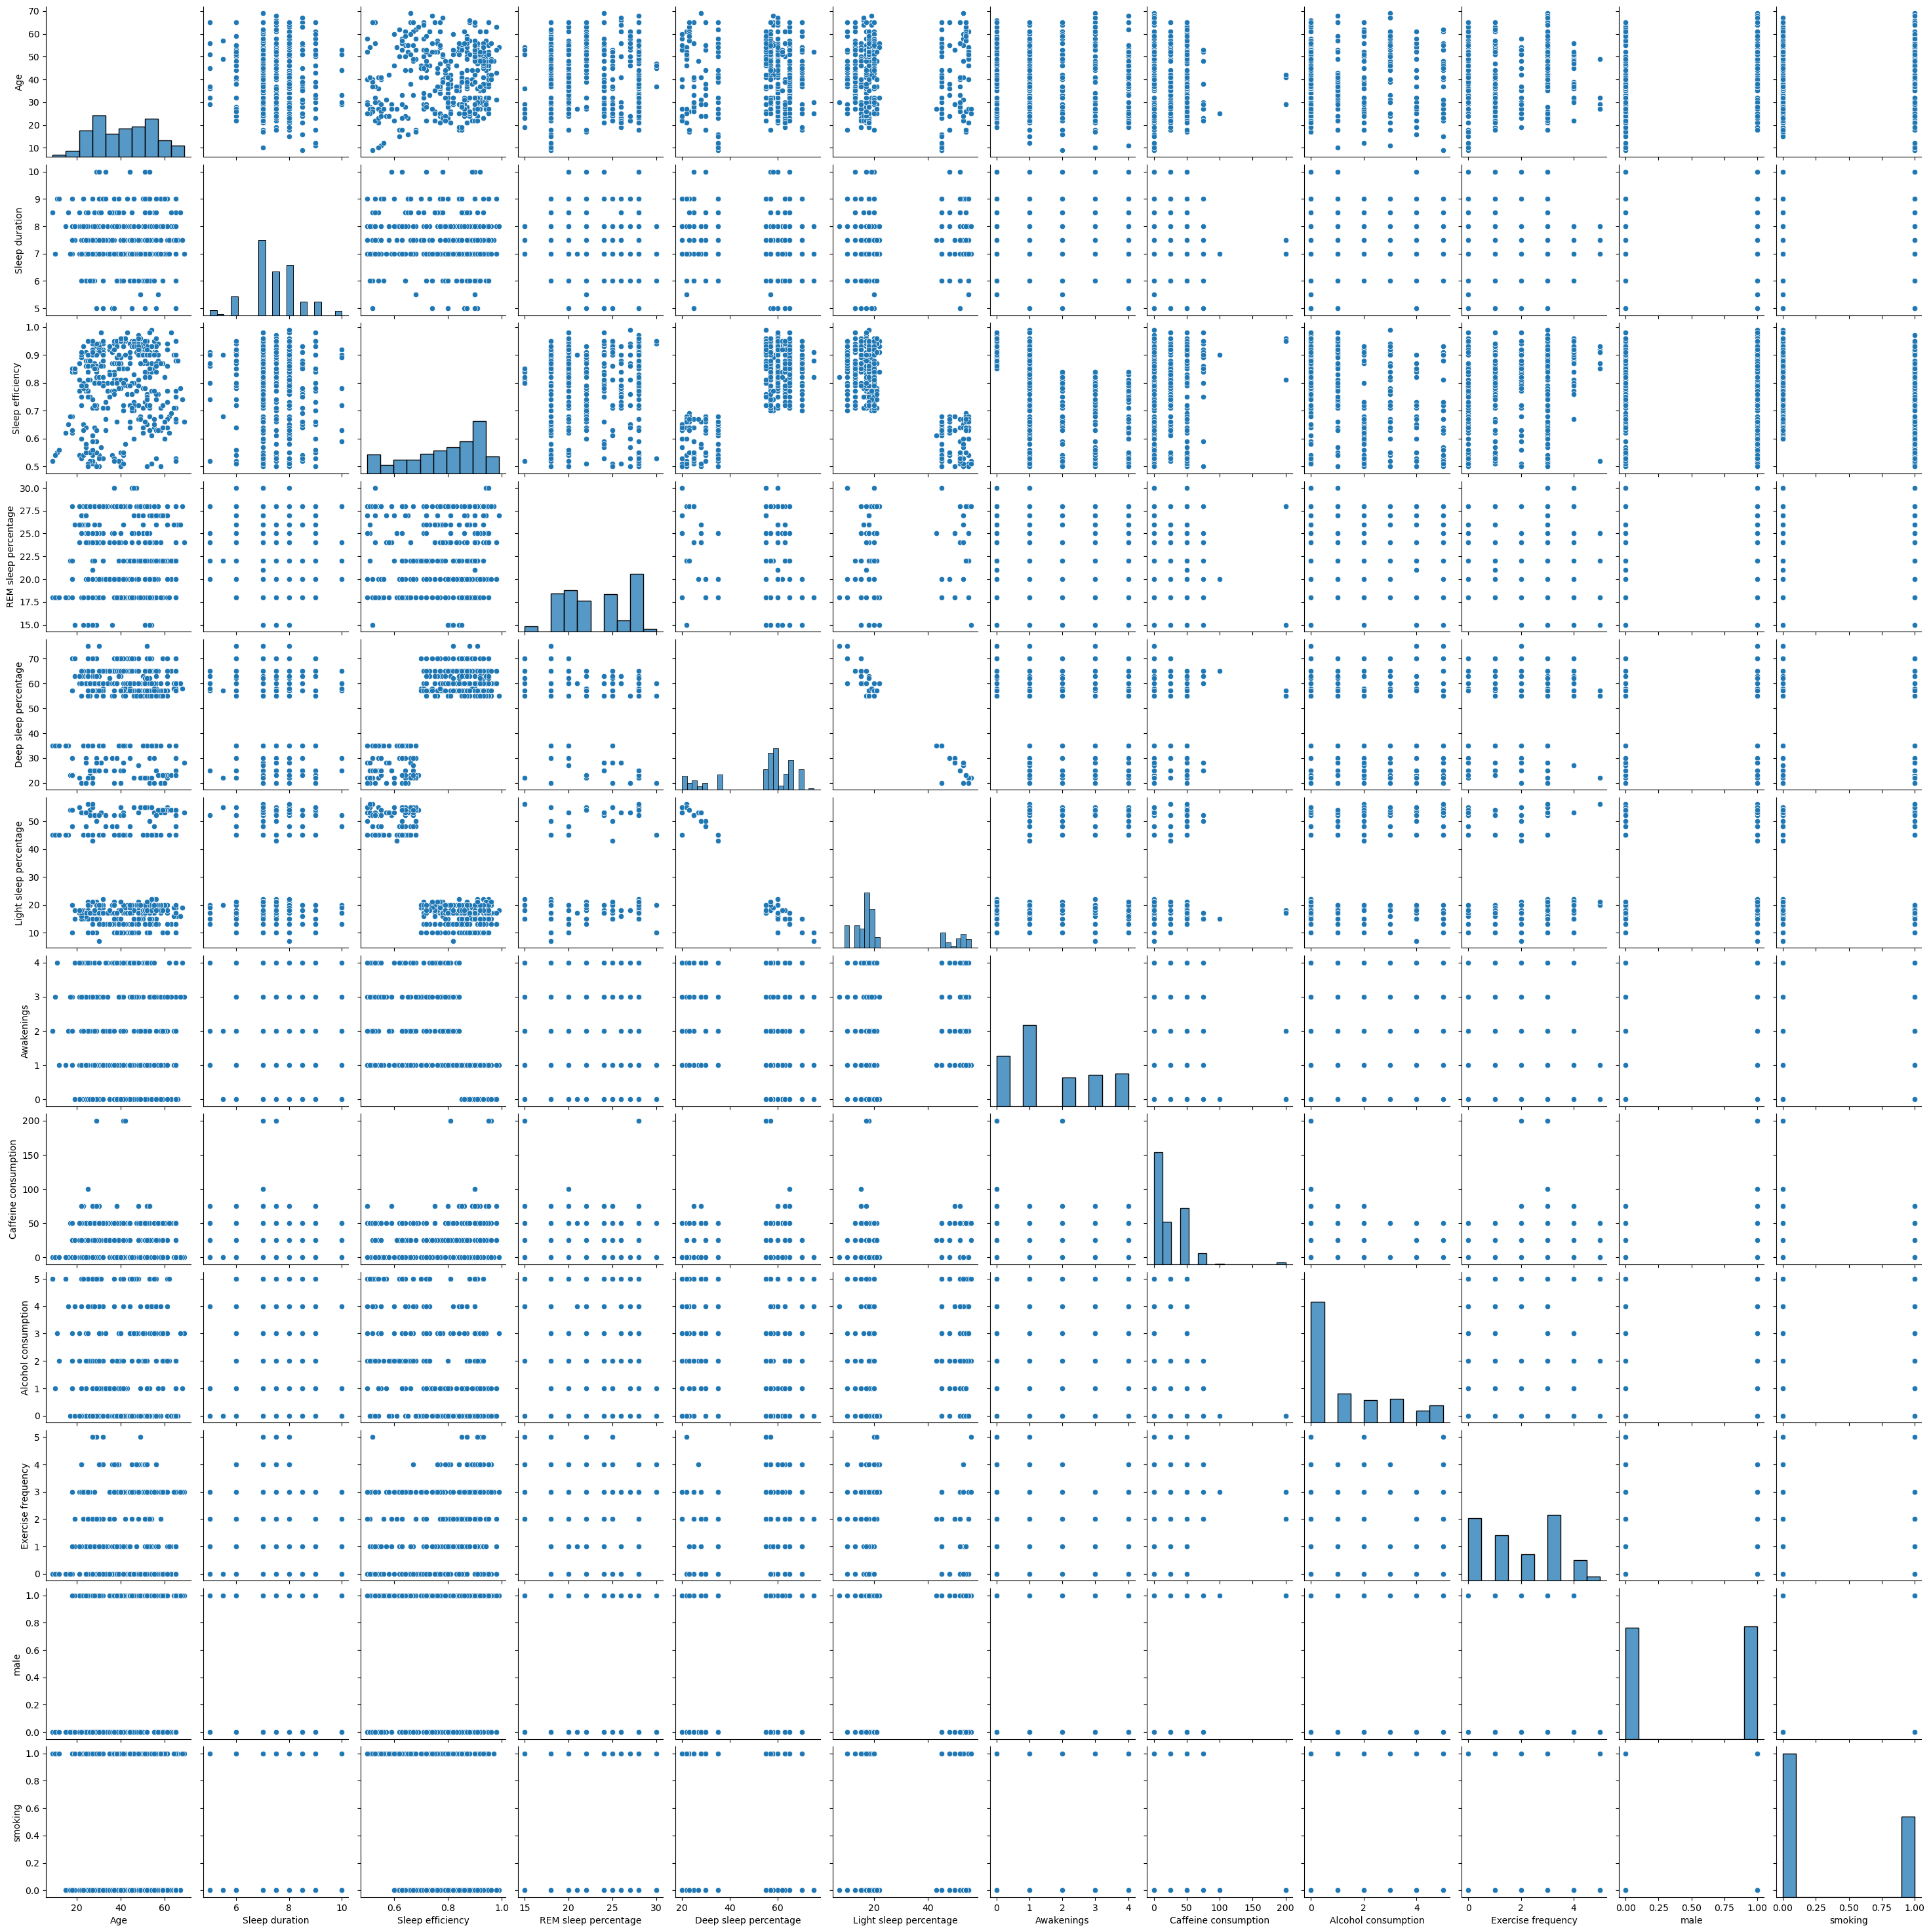

In [10]:
sns.pairplot(df)

# A pairplot is a type of scatterplot matrix that shows the relationship between all pairs of variables in a dataset.
# This type of visualization can be useful for quickly exploring the relationships between variables in a dataset, 
# as well as for identifying any outliers or unusual observations in the data.

<AxesSubplot: >

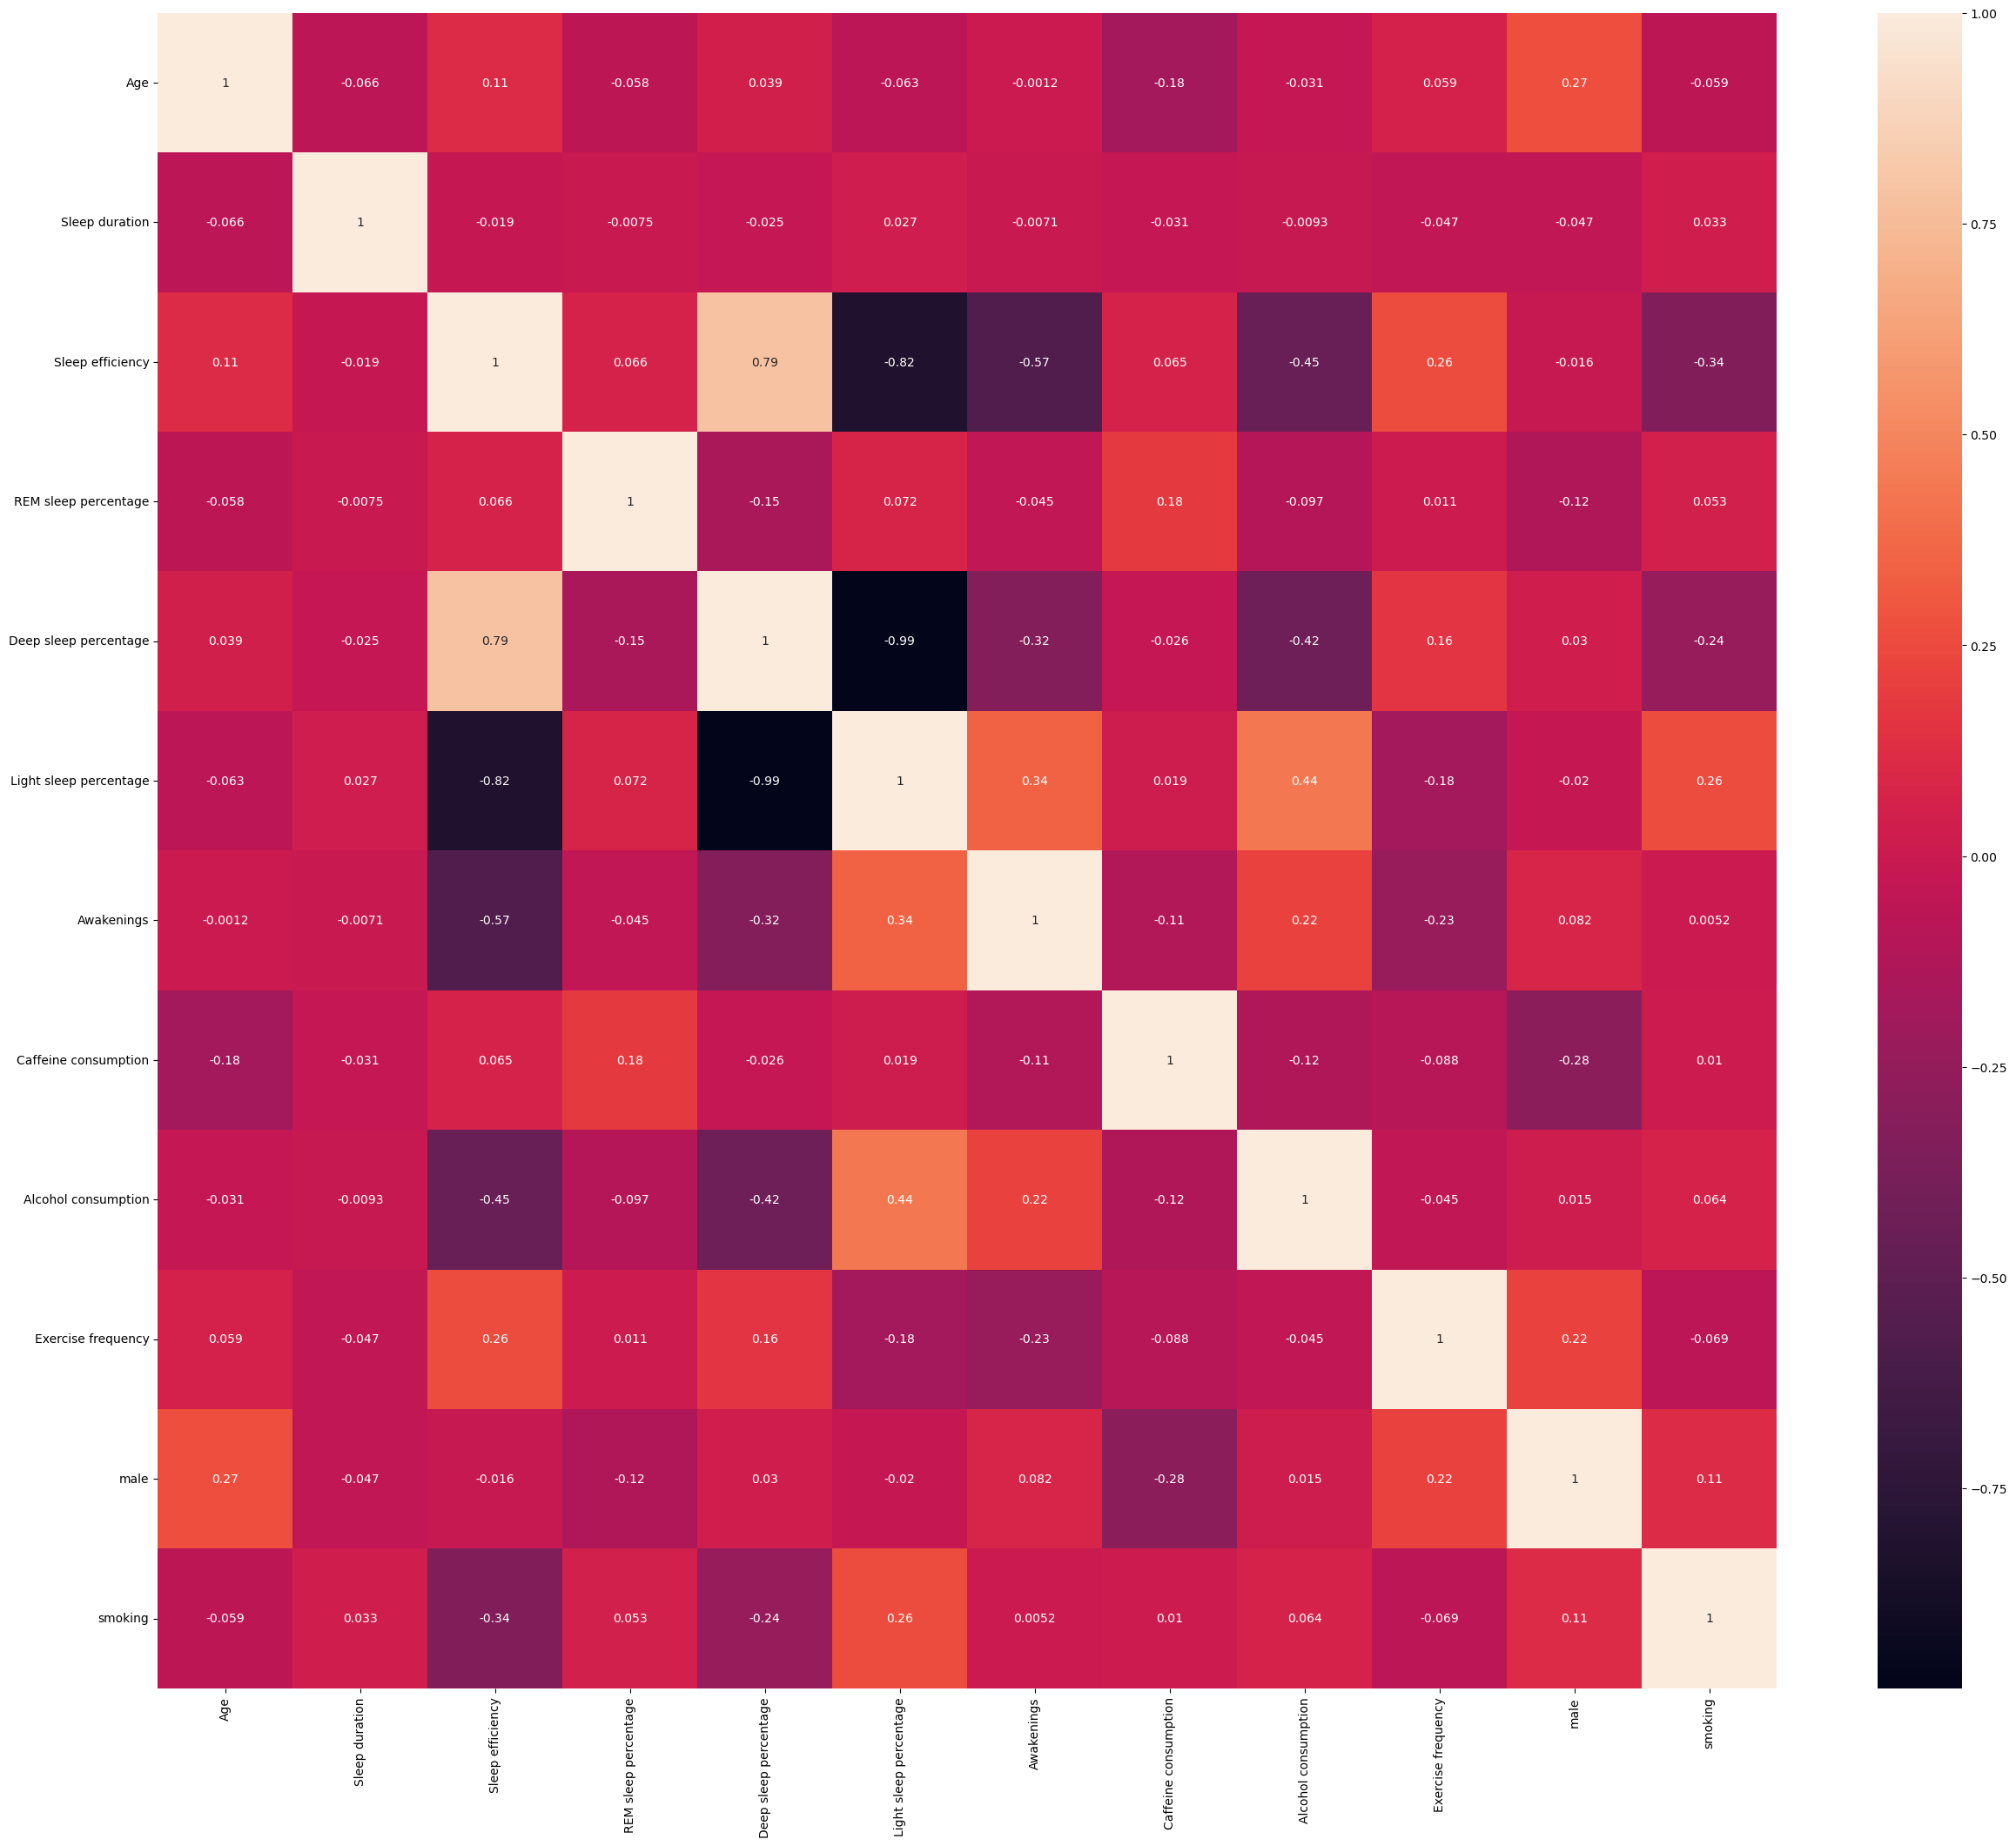

In [11]:
plt.figure(figsize=(30,25))
sns.heatmap(df.corr(), annot=True)

1. Sleep duration, sleep effficiency, REM sleep percentage, deep sleep percentage, light sleep percentage, and awakenings has a significant degree of correlation to each other.
2. Alcohol consumption has negative correlation to sleep efficiency and deep sleep percentage
3. Alcohol consumption has positive correlation to light sleep percentage and awakenings
4. Exercise has some degree of positive correlation to sleep efficiency and deep sleep percentage
5. Exercise has some degree of negative correlation to awakenings and light sleep percentage
6. Smoking is negatively correlated to sleep efficiency and deep sleep percentage
7. Smoking is positively correlated to light sleep percentage

**Note:** A positive correlation exists between two variables when an increase in the value of one variable is associated with an increase in the value of the other variable. In other words, as one variable increases, the other variable also increases. A negative correlation exists between two variables when an increase in the value of one variable is associated with a decrease in the value of the other variable. In other words, as one variable increases, the other variable decreases.

The strength of the correlation can be quantified using the Pearson correlation coefficient, which ranges from -1 to 1. A correlation coefficient of 1 indicates a perfect positive correlation, meaning that the two variables are perfectly related and change in the same direction. A correlation coefficient of -1 indicates a perfect negative correlation, meaning that the two variables are perfectly related but change in opposite directions. A correlation coefficient of 0 indicates that there is no correlation between the two variables.

In general, positive correlations indicate that two variables move in the same direction and negative correlations indicate that two variables move in opposite directions. Understanding the direction and strength of correlations between variables can be useful for making predictions, testing hypotheses, and identifying causal relationships.

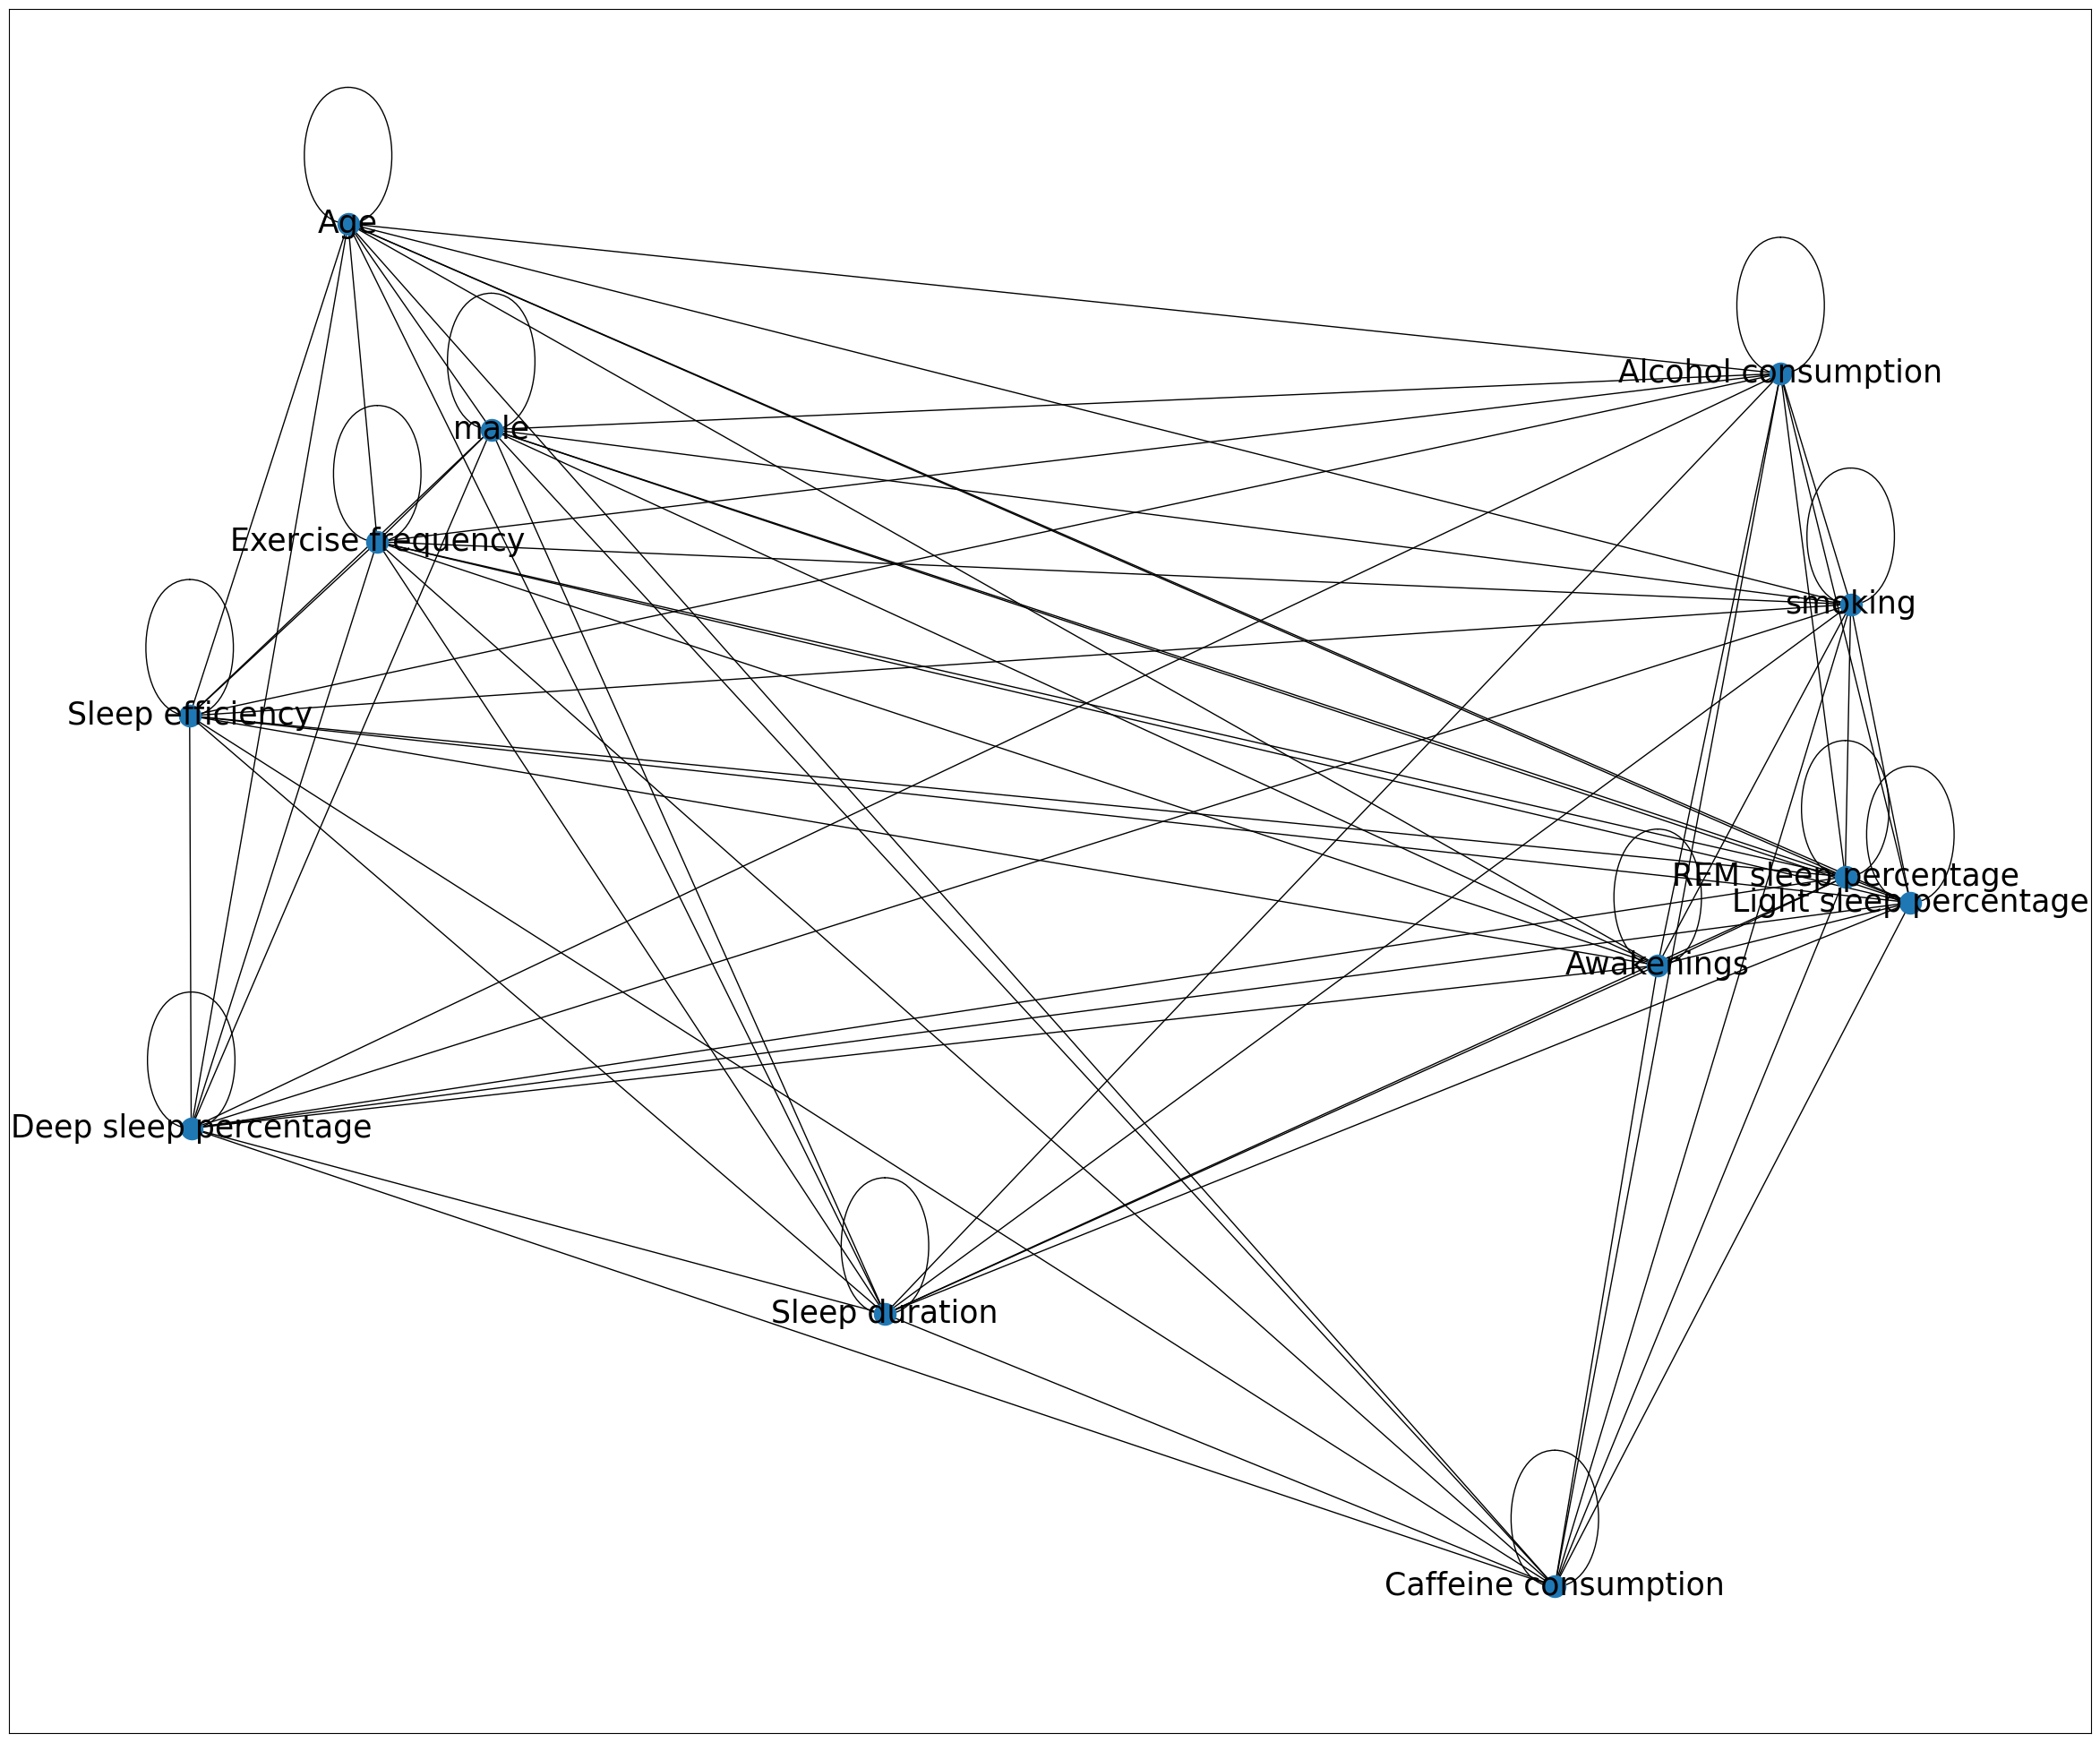

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a correlation matrix
corr = df.corr()

# Create a network graph
G = nx.from_pandas_adjacency(corr)

plt.figure(figsize=(30,25))
# Draw the network graph
nx.draw_networkx(G, font_size=25)

# Show the plot
plt.show()

Network graphs can be more flexible and can allow you to see the relationships between variables in a different way than a heat map.

In [13]:
df.columns

Index(['Age', 'Sleep duration', 'Sleep efficiency', 'REM sleep percentage',
       'Deep sleep percentage', 'Light sleep percentage', 'Awakenings',
       'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency',
       'male', 'smoking'],
      dtype='object')

In [14]:
df['Age'].unique()

array([65, 69, 40, 57, 27, 53, 41, 11, 50, 55, 30, 28, 36, 32, 21, 43, 29,
       63, 52, 35, 23, 47, 24, 18, 26, 46, 61, 38, 58, 31, 34, 37,  9, 16,
       54, 56, 25, 66, 48, 45, 39, 51, 44, 22, 15, 33, 42, 68, 49, 62, 64,
       59, 10, 60, 67, 17, 12, 19], dtype=int64)

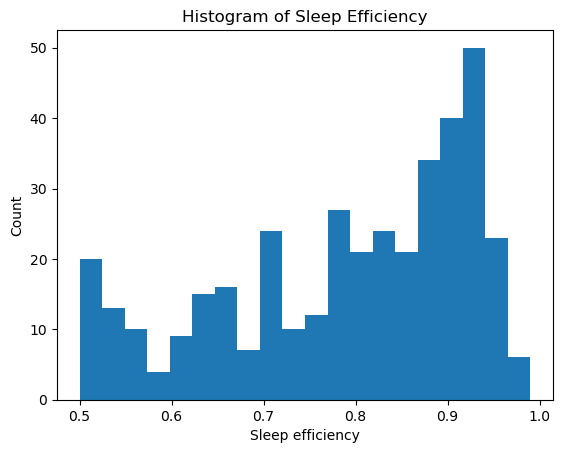

In [15]:
plt.hist(df['Sleep efficiency'], bins=20)
plt.xlabel('Sleep efficiency')
plt.ylabel('Count')
plt.title('Histogram of Sleep Efficiency')
plt.show()

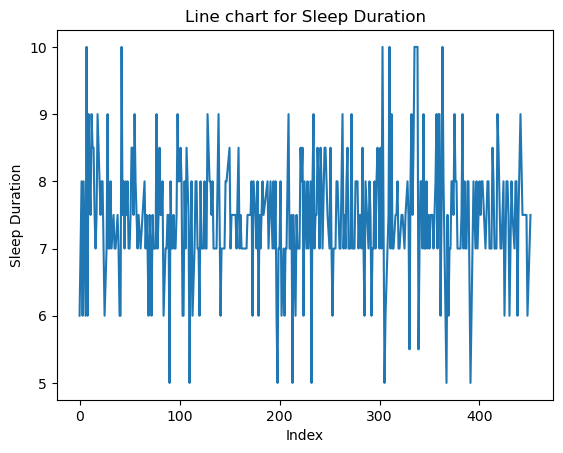

In [16]:
x = df.index
y = df['Sleep duration']

plt.plot(x, y)
plt.xlabel('Index')
plt.ylabel('Sleep Duration')
plt.title('Line chart for Sleep Duration')
plt.show()

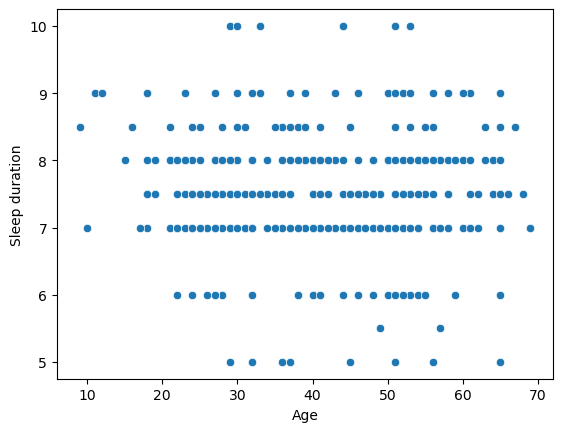

In [17]:
x = df['Age']
y = df['Sleep duration']
sns.scatterplot(x=x, y=y)
plt.show()

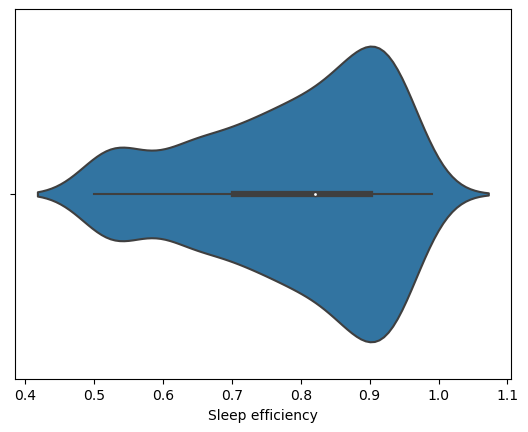

In [18]:
x = df['Sleep efficiency']
sns.violinplot(x=x)
plt.show()

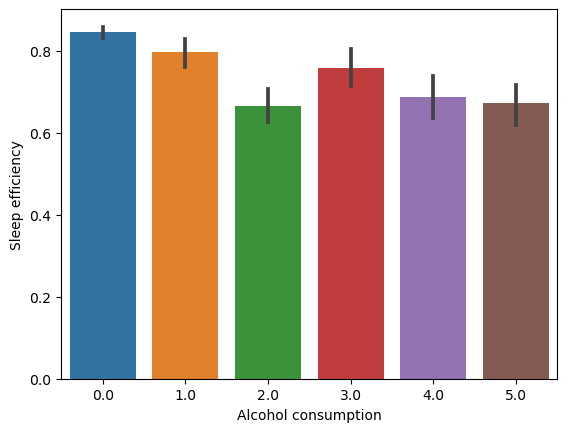

In [19]:
x = df['Alcohol consumption']
y = df['Sleep efficiency']
sns.barplot(x=x, y=y)
plt.show()

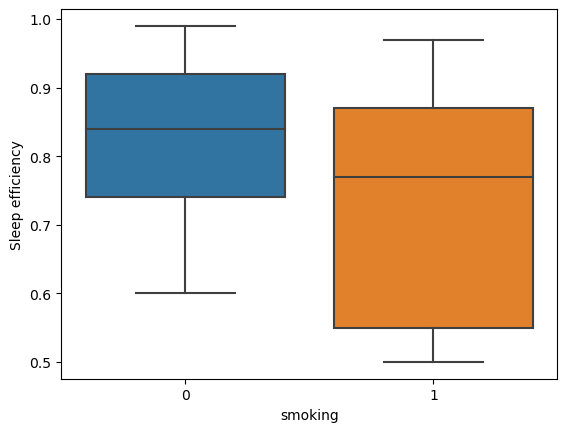

In [20]:
x = df['smoking']
y = df['Sleep efficiency']

sns.boxplot(x=x, y=y)
plt.show()

**Model Training**

In [22]:
outcome_measures = ['Sleep efficiency', 'Light sleep percentage', 'REM sleep percentage', 'Deep sleep percentage', 'Awakenings']

X = df.drop(outcome_measures, axis='columns')
y = df[outcome_measures]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
measures = []
model_names = []
model_mean_mses = []
for outcome_measure in outcome_measures:
    models = {
        'GB Regressor': GradientBoostingRegressor(),
        'RF Regressor': RandomForestRegressor(),
        'Linear Regression': LinearRegression(),
        'ElasticNet': ElasticNet(),
        'SGD Regressor': SGDRegressor(),
        'Bayesian Ridge': BayesianRidge(),
        'SVR': SVR(),
        'CatBoost': CatBoostRegressor(),
        'Kernel Ridge': KernelRidge(),
        'XGBoost': XGBRegressor(),
        'LightGBM': LGBMRegressor()
    }
    y_outcome = y_train[outcome_measure]
    
    for model_name, model in models.items():
        scores = cross_val_score(model, X_train_scaled, y_outcome, scoring='neg_mean_squared_error')
        measures.append(outcome_measure)
        model_names.append(model_name)
        model_mean_mses.append(-scores.mean())
        
    print(f'Model mean MSE calculation completed for {outcome_measure}')

Learning rate set to 0.032806
0:	learn: 0.1360745	total: 149ms	remaining: 2m 28s
1:	learn: 0.1345699	total: 149ms	remaining: 1m 14s
2:	learn: 0.1333410	total: 150ms	remaining: 49.7s
3:	learn: 0.1320528	total: 150ms	remaining: 37.3s
4:	learn: 0.1309940	total: 150ms	remaining: 29.9s
5:	learn: 0.1298792	total: 150ms	remaining: 24.9s
6:	learn: 0.1287720	total: 151ms	remaining: 21.4s
7:	learn: 0.1276363	total: 151ms	remaining: 18.7s
8:	learn: 0.1267187	total: 151ms	remaining: 16.7s
9:	learn: 0.1255630	total: 152ms	remaining: 15s
10:	learn: 0.1244190	total: 152ms	remaining: 13.6s
11:	learn: 0.1233447	total: 152ms	remaining: 12.5s
12:	learn: 0.1225349	total: 152ms	remaining: 11.6s
13:	learn: 0.1220098	total: 152ms	remaining: 10.7s
14:	learn: 0.1209636	total: 153ms	remaining: 10s
15:	learn: 0.1202822	total: 153ms	remaining: 9.4s
16:	learn: 0.1192742	total: 153ms	remaining: 8.85s
17:	learn: 0.1183713	total: 153ms	remaining: 8.37s
18:	learn: 0.1176589	total: 154ms	remaining: 7.93s
19:	learn: 0.1

In [28]:
model_scores = pd.DataFrame()
model_scores['outcome measure'] = measures
model_scores['model'] = model_names
model_scores['mean mse'] = model_mean_mses
model_scores

outcome measure              model    mean mse
0         Sleep efficiency       GB Regressor    0.012794
1         Sleep efficiency       RF Regressor    0.012765
2         Sleep efficiency  Linear Regression    0.012827
3         Sleep efficiency         ElasticNet    0.019217
4         Sleep efficiency      SGD Regressor    0.022669
5         Sleep efficiency     Bayesian Ridge    0.012754
6         Sleep efficiency                SVR    0.013359
7         Sleep efficiency           CatBoost    0.012816
8         Sleep efficiency       Kernel Ridge    0.045295
9         Sleep efficiency            XGBoost    0.014759
10        Sleep efficiency           LightGBM    0.011775
11  Light sleep percentage       GB Regressor  174.858062
12  Light sleep percentage       RF Regressor  149.428699
13  Light sleep percentage  Linear Regression  181.444096
14  Light sleep percentage         ElasticNet  216.751619
15  Light sleep percentage      SGD Regressor  179.625937
16  Light sleep percentage     Bayesian Ridge  180.259697
17  Light sleep percentage                SVR  235.345718
18  Light sleep percentage           CatBoost  149.801183
19  Light sleep percentage       Kernel Ridge  195.533016
20  Light sleep percentage            XGBoost  177.686754
21  Light sleep percentage           LightGBM  149.731095
22    REM sleep percentage       GB Regressor   15.143822
23    REM sleep percentage       RF Regressor   14.758456
24    REM sleep percentage  Linear Regression   15.260688
25    REM sleep percentage         ElasticNet   15.176891
26    REM sleep percentage      SGD Regressor   15.442820
27    REM sleep percentage     Bayesian Ridge   15.023582
28    REM sleep percentage                SVR   14.492833
29    REM sleep percentage           CatBoost   15.255291
30    REM sleep percentage       Kernel Ridge   41.430391
31    REM sleep percentage            XGBoost   19.555463
32    REM sleep percentage           LightGBM   14.357069
33   Deep sleep percentage       GB Regressor  190.269810
34   Deep sleep percentage       RF Regressor  173.947002
35   Deep sleep percentage  Linear Regression  196.082463
36   Deep sleep percentage         ElasticNet  228.790300
37   Deep sleep percentage      SGD Regressor  197.562652
38   Deep sleep percentage     Bayesian Ridge  194.692463
39   Deep sleep percentage                SVR  233.725791
40   Deep sleep percentage           CatBoost  163.530941
41   Deep sleep percentage       Kernel Ridge  381.479097
42   Deep sleep percentage            XGBoost  206.816904
43   Deep sleep percentage           LightGBM  166.991758
44              Awakenings       GB Regressor    1.796641
45              Awakenings       RF Regressor    1.789167
46              Awakenings  Linear Regression    1.737933
47              Awakenings         ElasticNet    1.865119
48              Awakenings      SGD Regressor    1.769949
49              Awakenings     Bayesian Ridge    1.732388
50              Awakenings                SVR    1.942166
51              Awakenings           CatBoost    1.870922
52              Awakenings       Kernel Ridge    1.966159
53              Awakenings            XGBoost    2.403197
54              Awakenings           LightGBM    1.795648

In [29]:
chosen_models = {
    'Sleep efficiency': LGBMRegressor(),
    'Light sleep percentage': LGBMRegressor(),
    'REM sleep percentage': LGBMRegressor(),
    'Deep sleep percentage': CatBoostRegressor(),
    'Awakenings': BayesianRidge()
}

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import spearmanr

measures = []
mses = []
maes = []
correlations = []
p_values = []
for outcome_measure in outcome_measures:
    model = chosen_models[outcome_measure]
    model.fit(X_train_scaled, y_train[outcome_measure])
    y_predicted = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test[outcome_measure], y_predicted)
    mae = mean_absolute_error(y_test[outcome_measure], y_predicted)
    correlations_stats = spearmanr(y_test[outcome_measure], y_predicted)
    measures.append(outcome_measure)
    mses.append(mse)
    maes.append(mae)
    correlations.append(correlations_stats.correlation)
    p_values.append(correlations_stats.pvalue)

Learning rate set to 0.033992
0:	learn: 15.4261932	total: 468us	remaining: 468ms
1:	learn: 15.2912185	total: 754us	remaining: 377ms
2:	learn: 15.1258334	total: 1.1ms	remaining: 366ms
3:	learn: 15.0159020	total: 1.44ms	remaining: 359ms
4:	learn: 14.8489733	total: 1.76ms	remaining: 351ms
5:	learn: 14.7032006	total: 2.1ms	remaining: 349ms
6:	learn: 14.6031860	total: 2.44ms	remaining: 346ms
7:	learn: 14.4832138	total: 2.76ms	remaining: 343ms
8:	learn: 14.3326362	total: 3.1ms	remaining: 341ms
9:	learn: 14.2172854	total: 3.46ms	remaining: 342ms
10:	learn: 14.1559863	total: 3.65ms	remaining: 328ms
11:	learn: 14.0224095	total: 3.98ms	remaining: 328ms
12:	learn: 13.9545000	total: 4.13ms	remaining: 314ms
13:	learn: 13.8873560	total: 4.33ms	remaining: 305ms
14:	learn: 13.8012899	total: 4.67ms	remaining: 306ms
15:	learn: 13.7148248	total: 4.88ms	remaining: 300ms
16:	learn: 13.6212913	total: 5.23ms	remaining: 302ms
17:	learn: 13.5238472	total: 5.56ms	remaining: 303ms
18:	learn: 13.4222596	total: 5.

In [31]:
outcome_scores = pd.DataFrame()
outcome_scores['outcome measure'] = measures
outcome_scores['MSE'] = mses
outcome_scores['MAE'] = maes
outcome_scores['Correlation'] = correlations
outcome_scores['Correlation p-value'] = p_values
outcome_scores

outcome measure         MSE       MAE  Correlation  \
0        Sleep efficiency    0.008897  0.072646     0.565199   
1  Light sleep percentage  115.107275  7.302876     0.415362   
2    REM sleep percentage   12.149733  2.797886     0.397835   
3   Deep sleep percentage  144.891755  7.814184     0.397637   
4              Awakenings    1.640156  1.061046     0.251741   

   Correlation p-value  
0         7.005289e-08  
1         1.558825e-04  
2         3.098166e-04  
3         3.121587e-04  
4         2.619146e-02

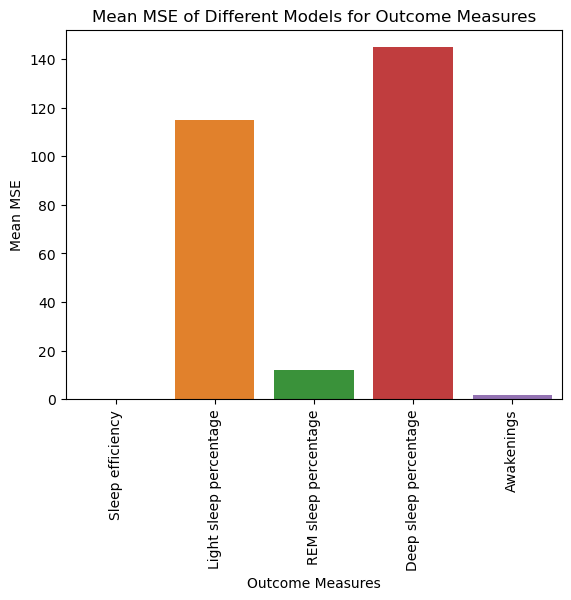

In [32]:
sns.barplot(x='outcome measure', y='MSE', data=outcome_scores)
plt.title('Mean MSE of Different Models for Outcome Measures')
plt.xlabel('Outcome Measures')
plt.ylabel('Mean MSE')
plt.xticks(rotation=90)
plt.show()

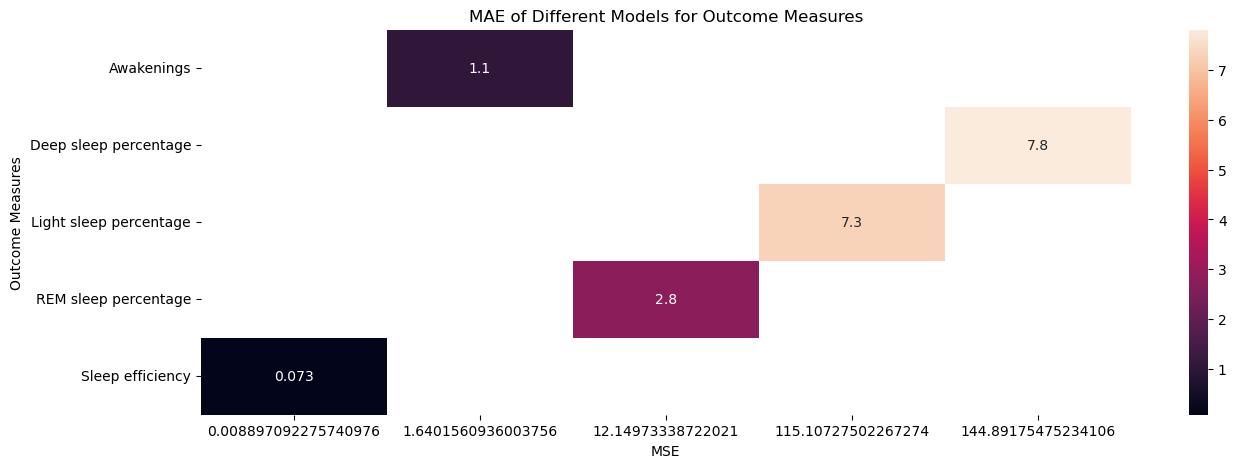

In [33]:
plt.figure(figsize=(15,5))
sns.heatmap(outcome_scores.pivot(index='outcome measure', columns='MSE', values='MAE'), annot=True)
plt.title('MAE of Different Models for Outcome Measures')
plt.xlabel('MSE')
plt.ylabel('Outcome Measures')
plt.show()